In [ ]:
import numpy as np
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=100):
        self.weights = np.zeros(input_size + 1)
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation(self, x):
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self.activation(summation)

    def train(self, training_inputs, labels):
        for _ in range(self.epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)

or_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
or_labels = np.array([0, 1, 1, 1])

or_perceptron = Perceptron(input_size=2)
or_perceptron.train(or_inputs, or_labels)

print("OR Gate:")
for inputs in or_inputs:
    print(f"{inputs[0]} OR {inputs[1]} = {or_perceptron.predict(inputs)}")

and_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
and_labels = np.array([0, 0, 0, 1])

and_perceptron = Perceptron(input_size=2)
and_perceptron.train(and_inputs, and_labels)

print("\nAND Gate:")
for inputs in and_inputs:
    print(f"{inputs[0]} AND {inputs[1]} = {and_perceptron.predict(inputs)}")

OR Gate:
0 OR 0 = 0
0 OR 1 = 1
1 OR 0 = 1
1 OR 1 = 1

AND Gate:
0 AND 0 = 0
0 AND 1 = 0
1 AND 0 = 0
1 AND 1 = 1


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

dataset = pd.read_csv("/content/horseRacing - horseRacing.csv")

In [ ]:
dataset.drop_duplicates(inplace=True)
dataset.dropna(inplace=True)

In [ ]:
label_encoder = LabelEncoder()
dataset['label'] = label_encoder.fit_transform(dataset['calc_position'] < 3)  # Binary classification based on 'calc_position'

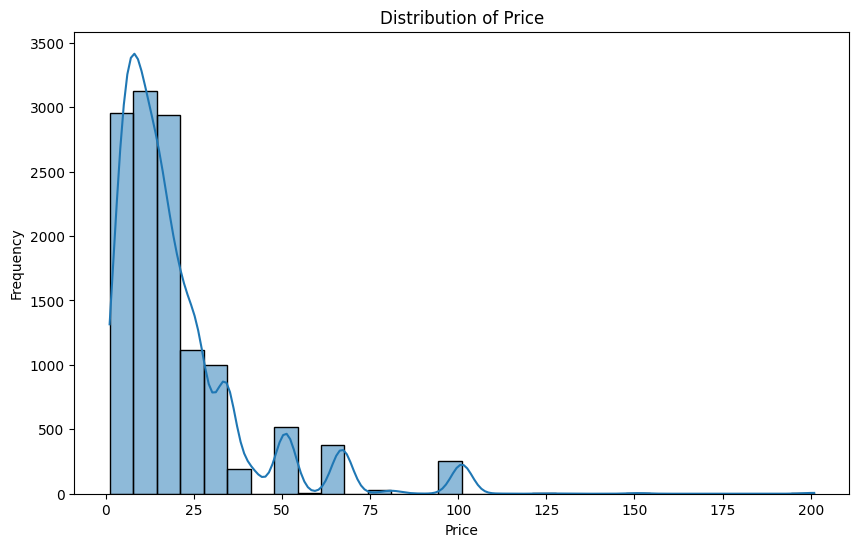

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='price', bins=30, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
one_hot_race = pd.get_dummies(dataset['race_id'], prefix='race')
dataset = pd.concat([dataset, one_hot_race], axis=1)
dataset.drop('race_id', axis=1, inplace=True)

In [ ]:
one_hot_horse = pd.get_dummies(dataset['horse_id'], prefix='horse')
dataset = pd.concat([dataset, one_hot_horse], axis=1)
dataset.drop('horse_id', axis=1, inplace=True)

In [ ]:
X = dataset.drop('label', axis=1)
y = dataset['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp_classifier.fit(X_train, y_train)

accuracy = mlp_classifier.score(X_test, y_test)
print("MLP Classifier Accuracy:", accuracy)

MLP Classifier Accuracy: 0.981629392971246
